In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_csv = pd.read_csv(city_data_to_load)
ride_csv = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
#left merge is done because city_csv is more condensed data
merged_ride_data = pd.merge(ride_csv,city_csv, on='city', how='left')
# Count to see if all data is present without NaN data
merged_ride_data.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [3]:
#shows a preview of the merged data
merged_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

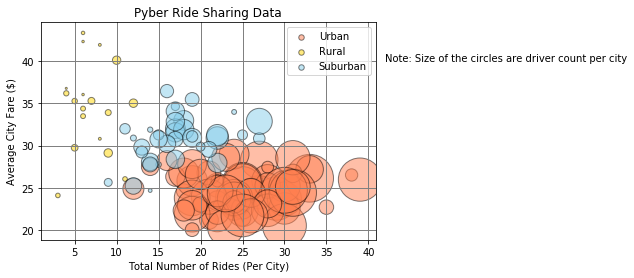

<Figure size 432x288 with 0 Axes>

In [21]:
# Obtain the x and y coordinates for each of the three city types
type_group = merged_ride_data

#since I dont know of an easy way to label each type
#i separated them into each city type
urban_rideid = []
urban_fare = []
urban_driver = []
urban_city = []
rural_rideid = []
rural_fare = []
rural_driver = []
rural_city = []
suburban_ride_id = []
suburban_fare = []
suburban_driver = []
suburban_city = []
for counted_frame in range(len(type_group)):
    if type_group['type'][counted_frame] == 'Urban':
        urban_city.append(type_group['city'][counted_frame])
        urban_rideid.append(type_group['ride_id'][counted_frame])
        urban_fare.append(type_group['fare'][counted_frame])
        urban_driver.append(type_group['driver_count'][counted_frame])
    elif type_group['type'][counted_frame] == 'Rural':
        rural_city.append(type_group['city'][counted_frame])
        rural_rideid.append(type_group['ride_id'][counted_frame])
        rural_fare.append(type_group['fare'][counted_frame])
        rural_driver.append(type_group['driver_count'][counted_frame])
    elif type_group['type'][counted_frame] == 'Suburban':
        suburban_city.append(type_group['city'][counted_frame])
        suburban_ride_id.append(type_group['ride_id'][counted_frame])
        suburban_fare.append(type_group['fare'][counted_frame])
        suburban_driver.append(type_group['driver_count'][counted_frame])

#built a dataframe for each city type       
        
urban_df = pd.DataFrame({
    'city': urban_city,
    'ride id': urban_rideid,
    'fare': urban_fare,
    'driver count': urban_driver
})      
rural_df = pd.DataFrame({
    'city': rural_city,
    'ride id': rural_rideid,
    'fare': rural_fare,
    'driver count': rural_driver
}) 

suburban_df = pd.DataFrame({
    'city': suburban_city,
    'ride id': suburban_ride_id,
    'fare': suburban_fare,
    'driver count': suburban_driver
})
#grouped each type by city
urban_grouped = urban_df.groupby(by='city')
rural_grouped = rural_df.groupby(by='city')
suburban_grouped = suburban_df.groupby(by='city')

#created separate x,y, size for each type of city
u_x = urban_grouped['ride id'].count()
u_y = urban_grouped['fare'].mean()
u_size = urban_grouped['driver count'].sum()

r_x = rural_grouped['ride id'].count()
r_y = rural_grouped['fare'].mean()
r_size = rural_grouped['driver count'].sum()

subu_x = suburban_grouped['ride id'].count()
subu_y = suburban_grouped['fare'].mean()
subu_size = suburban_grouped['driver count'].sum()

# Build the scatter plots for each city types
bubble_plot_urban = plt.scatter(u_x, u_y, u_size, color = 'coral', label = 'Urban', alpha = 0.5, linewidth = 1 , edgecolor = 'black')
bubble_plot_rural = plt.scatter(r_x, r_y, r_size, color = 'gold', label = 'Rural', alpha = 0.5, linewidth = 1 , edgecolor = 'black')
bubble_plot_suburban = plt.scatter(subu_x, subu_y, subu_size, color = 'skyblue', label = 'Suburban', alpha = 0.5, linewidth = 1 , edgecolor = 'black')

#labels on chart
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average City Fare ($)")
plt.title("Pyber Ride Sharing Data")

# Incorporate the other graph properties
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.text(42,40, 'Note: Size of the circles are driver count per city')
# Create a legend
lgnd = plt.legend(loc="best")
#each handle refers to the index of the labels
#there are three labels 
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.show()
# Save Figure
plt.savefig("bubble_chart.png")

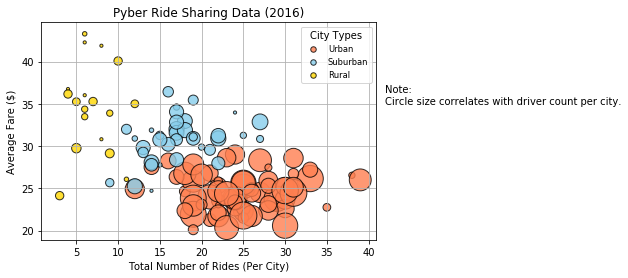

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

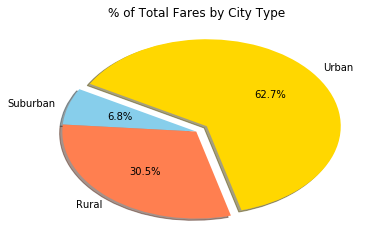

<Figure size 432x288 with 0 Axes>

In [243]:
# Calculate Type Percents
city_types = list(merged_ride_data['type'].unique())

colors = ['gold', 'skyblue', 'coral']
city_fare_sum = [urban_df['fare'].sum(), rural_df['fare'].sum(), suburban_df['fare'].sum()]
explode = (0.1, 0, 0)
plt.pie(city_fare_sum, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=285)

plt.title('% of Total Fares by City Type')
# Build Pie Chart
plt.show()
# Save Figure
plt.savefig("pie1.png")

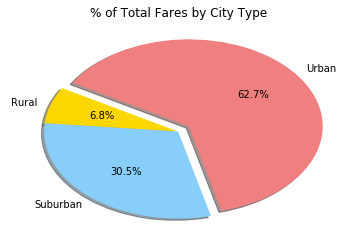

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

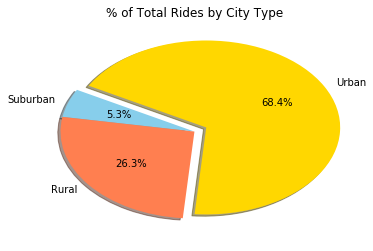

In [242]:
# Calculate Ride Percents
city_types = list(merged_ride_data['type'].unique())

colors = ['gold', 'skyblue', 'coral']
city_ride_sum = [urban_df['ride id'].count(), rural_df['ride id'].count(), suburban_df['ride id'].count()]
explode = (0.1, 0, 0)
plt.pie(city_ride_sum, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=265)

plt.title('% of Total Rides by City Type')
# Build Pie Chart
plt.savefig("pie2.png")
plt.show()
# Build Pie Chart

# Save Figure


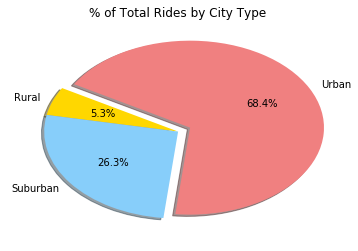

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

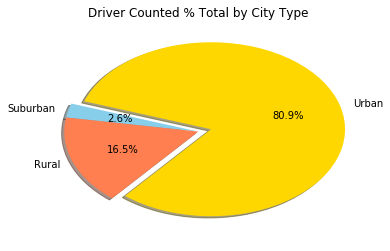

In [25]:
# Calculate Driver Percents
city_types = list(merged_ride_data['type'].unique())

colors = ['gold', 'skyblue', 'coral']
city_driver_count = [urban_grouped['driver count'].max().sum(), rural_grouped['driver count'].max().sum(), suburban_grouped['driver count'].max().sum()]
explode = (0.1, 0, 0)
plt.pie(city_driver_count, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)

plt.title('Driver Counted % Total by City Type')
# Build Pie Chart

# Save Figure
plt.savefig("pie3.png")
plt.show()

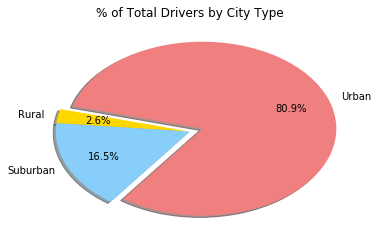

In [6]:
# Show Figure
plt.show()

In [ ]:
'''
80.9% of Drivers are Urban city drivers. 
This coorelates with the 68.4% of rides within urban cities.
Interesting is 16.5% of drivers are suburban, while 26.3% of rides are suburban rides.

Rural is above all the smallest category for rides and drivers.



'''